# Traffic Sign Classification with Keras

Keras exists to make coding deep neural networks simpler. To demonstrate just how easy it is, you’re going to use Keras to build a convolutional neural network in a few dozen lines of code.

You’ll be connecting the concepts from the previous lessons to the methods that Keras provides.

## Dataset

The network you'll build with Keras is similar to the example that you can find in Keras’s GitHub repository that builds out a [convolutional neural network for MNIST](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py). 

However, instead of using the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, you're going to use the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news) dataset that you've used previously.

You can download pickle files with sanitized traffic sign data here.

## Overview

Here are the steps you'll take to build the network:

1. First load the training data and do a train/validation split.
2. Preprocess data.
3. Build a feedforward neural network to classify traffic signs.
4. Build a convolutional neural network to classify traffic signs.
5. Evaluate performance of final neural network on testing data.

Keep an eye on the network’s accuracy over time. Once the accuracy reaches the 98% range, you can be confident that you’ve built and trained an effective model.

In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import math

## Load the Data

Start by importing the data from the pickle file.

In [15]:
# TODO: Implement load the data here.
with open('train.p', 'rb') as f:
    data = pickle.load(f)

## Validate the Network
Split the training data into a training and validation set.

Measure the [validation accuracy](https://keras.io/models/sequential/) of the network after two training epochs.

Hint: [Use the `train_test_split()` method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn.

In [16]:
# TODO: Use `train_test_split` here.
X_train, X_val, y_train, y_val = train_test_split(data['features'], data['labels'], random_state=0, test_size=0.33)

In [17]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

## Preprocess the Data

Now that you've loaded the training data, preprocess the data such that it's in the range between -0.5 and 0.5.

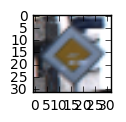

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 1))
plt.imshow(X_val[0])
plt.show()

In [18]:
# TODO: Implement data normalization here.
X_train = X_train / 255 - 0.5
X_val = X_val / 255 - 0.5

In [19]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(math.isclose(np.min(X_train), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_train), 0.5, abs_tol=1e-5)), "The range of the training data is: %.1f to %.1f" % (np.min(X_train), np.max(X_train))
assert(math.isclose(np.min(X_val), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_val), 0.5, abs_tol=1e-5)), "The range of the validation data is: %.1f to %.1f" % (np.min(X_val), np.max(X_val))

## Build a Two-Layer Feedfoward Network

The code you've written so far is for data processing, not specific to Keras. Here you're going to build Keras-specific code.

Build a two-layer feedforward neural network, with 128 neurons in the fully-connected hidden layer. 

To get started, review the Keras documentation about [models](https://keras.io/models/sequential/) and [layers](https://keras.io/layers/core/).

The Keras example of a [Multi-Layer Perceptron](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) network is similar to what you need to do here. Use that as a guide, but keep in mind that there are a number of differences.

In [8]:
# TODO: Build a two-layer feedforward neural network with Keras here.
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()

model.add(Dense(128, input_shape=(32*32*3, )))
model.add(Activation('relu'))

model.add(Dense(43))
model.add(Activation('softmax'))

Using TensorFlow backend.


In [9]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
dense_layers = []
for l in model.layers:
    if type(l) == Dense:
        dense_layers.append(l)
assert(len(dense_layers) == 2), "There should be 2 Dense layers."
d1 = dense_layers[0]
d2 = dense_layers[1]
assert(d1.input_shape == (None, 3072))
assert(d1.output_shape == (None, 128))
assert(d2.input_shape == (None, 128))
assert(d2.output_shape == (None, 43))

last_layer = model.layers[-1]
assert(last_layer.activation.__name__ == 'softmax'), "Last layer should be softmax activation, is {}.".format(last_layer.activation.__name__)

In [10]:
# Debugging
for l in model.layers:
    print(l.name, l.input_shape, l.output_shape, l.activation)

dense_1 (None, 3072) (None, 128) <function linear at 0x126fba6a8>
activation_1 (None, 128) (None, 128) <function relu at 0x126fba488>
dense_2 (None, 128) (None, 43) <function linear at 0x126fba6a8>
activation_2 (None, 43) (None, 43) <function softmax at 0x126fba1e0>


## Train the Network
Compile and train the network for 2 epochs. [Use the `adam` optimizer, with `categorical_crossentropy` loss.](https://keras.io/models/sequential/)

Hint 1: In order to use categorical cross entropy, you will need to [one-hot encode the labels](https://github.com/fchollet/keras/blob/master/keras/utils/np_utils.py).

Hint 2: In order to pass the input images to the fully-connected hidden layer, you will need to [reshape the input](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py).

Hint 3: Keras's `.fit()` method returns a `History.history` object, which the tests below use. Save that to a variable named `history`.

In [11]:
from keras.utils import np_utils

# reshape the input
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]) 
X_val_flat = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2] * X_val.shape[3])

# one-hot encode the labels
Y_train = np_utils.to_categorical(y_train)
Y_val = np_utils.to_categorical(y_val)

In [12]:
# TODO: Compile and train the model here.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = \
model.fit(X_train_flat, Y_train,
                 batch_size=128, nb_epoch=10, 
                 verbose=1, validation_data=(X_val_flat, Y_val))

Train on 26270 samples, validate on 12939 samples
Epoch 1/10
26270/26270 [==============================] - 5s - loss: 1.9360 - acc: 0.5008 - val_loss: 1.1789 - val_acc: 0.6897
Epoch 2/10
26270/26270 [==============================] - 4s - loss: 0.9533 - acc: 0.7478 - val_loss: 0.7804 - val_acc: 0.8035
Epoch 3/10
26270/26270 [==============================] - 4s - loss: 0.6741 - acc: 0.8249 - val_loss: 0.6346 - val_acc: 0.8345
Epoch 4/10
26270/26270 [==============================] - 4s - loss: 0.5440 - acc: 0.8588 - val_loss: 0.5281 - val_acc: 0.8522
Epoch 5/10
26270/26270 [==============================] - 4s - loss: 0.4536 - acc: 0.8842 - val_loss: 0.4651 - val_acc: 0.8835
Epoch 6/10
26270/26270 [==============================] - 5s - loss: 0.3967 - acc: 0.8951 - val_loss: 0.4475 - val_acc: 0.8780
Epoch 7/10
26270/26270 [==============================] - 5s - loss: 0.3488 - acc: 0.9095 - val_loss: 0.4876 - val_acc: 0.8640
Epoch 8/10
26270/26270 [==============================] - 5s 

In [14]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['acc'][-1] > 0.92), "The training accuracy was: %.3f" % history.history['acc'][-1]
assert(history.history['val_acc'][-1] > 0.9), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]

**Validation Accuracy**: 0.9171

## Congratulations
You've built a feedforward neural network in Keras!

Don't stop here! Next, you'll add a convolutional layer to drive.py.

## Convolutions
Build a new network, similar to your existing network. Before the hidden layer, add a 3x3 [convolutional layer](https://keras.io/layers/convolutional/#convolution2d) with 32 filters and valid padding.

Then compile and train the network.

Hint 1: The Keras example of a [convolutional neural network](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py) for MNIST would be a good example to review.

Hint 2: Now that the first layer of the network is a convolutional layer, you no longer need to reshape the input images before passing them to the network. You might need to reload your training data to recover the original shape.

Hint 3: Add a [`Flatten()` layer](https://keras.io/layers/core/#flatten) between the convolutional layer and the fully-connected hidden layer.

In [20]:
# TODO: Re-construct the network and add a convolutional layer before the first fully-connected layer.
from keras.layers import Convolution2D
from keras.layers import Flatten

assert(X_train.shape[1:] == (32, 32, 3))
assert(X_val.shape[1:] == (32, 32, 3))

model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='valid'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(43))
model.add(Activation('softmax'))

In [21]:
# Debugging
for l in model.layers:
    try:
        print(l.name, l.input_shape, l.output_shape, l.activation)
    except:
        print(l.name, l.input_shape, l.output_shape)

convolution2d_1 (None, 32, 32, 3) (None, 30, 30, 32) <function linear at 0x126fba6a8>
activation_3 (None, 30, 30, 32) (None, 30, 30, 32) <function relu at 0x126fba488>
flatten_1 (None, 30, 30, 32) (None, 28800)
dense_3 (None, 28800) (None, 128) <function linear at 0x126fba6a8>
activation_4 (None, 128) (None, 128) <function relu at 0x126fba488>
dense_4 (None, 128) (None, 43) <function linear at 0x126fba6a8>
activation_5 (None, 43) (None, 43) <function softmax at 0x126fba1e0>


In [22]:
# TODO: Compile and train the model here.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = \
model.fit(X_train, Y_train, 
                 batch_size=128, nb_epoch=10, 
                 verbose=1, validation_data=(X_val, Y_val))

Train on 26270 samples, validate on 12939 samples
Epoch 1/10
26270/26270 [==============================] - 47s - loss: 1.4117 - acc: 0.6309 - val_loss: 0.5565 - val_acc: 0.8476
Epoch 2/10
26270/26270 [==============================] - 47s - loss: 0.3604 - acc: 0.9100 - val_loss: 0.2946 - val_acc: 0.9286
Epoch 3/10
26270/26270 [==============================] - 49s - loss: 0.1836 - acc: 0.9581 - val_loss: 0.2094 - val_acc: 0.9463
Epoch 4/10
26270/26270 [==============================] - 45s - loss: 0.1210 - acc: 0.9727 - val_loss: 0.1627 - val_acc: 0.9610
Epoch 5/10
26270/26270 [==============================] - 45s - loss: 0.0854 - acc: 0.9815 - val_loss: 0.2338 - val_acc: 0.9412
Epoch 6/10
26270/26270 [==============================] - 51s - loss: 0.0643 - acc: 0.9859 - val_loss: 0.1324 - val_acc: 0.9692
Epoch 7/10
26270/26270 [==============================] - 43s - loss: 0.0473 - acc: 0.9904 - val_loss: 0.1362 - val_acc: 0.9672
Epoch 8/10
26270/26270 [==============================

In [23]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['val_acc'][-1] > 0.95), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]

**Validation Accuracy**: 

## Pooling
Re-construct your network and add a 2x2 [pooling layer](https://keras.io/layers/pooling/#maxpooling2d) immediately following your convolutional layer.

Then compile and train the network.

In [24]:
from keras.layers import MaxPooling2D

model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(43))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Debug
for l in model.layers:
    try:
        print(l.name, l.input_shape, l.output_shape, l.activation)
    except:
        print(l.name, l.input_shape, l.output_shape)

convolution2d_2 (None, 32, 32, 3) (None, 30, 30, 32) <function linear at 0x126fba6a8>
maxpooling2d_1 (None, 30, 30, 32) (None, 15, 15, 32)
activation_6 (None, 15, 15, 32) (None, 15, 15, 32) <function relu at 0x126fba488>
flatten_2 (None, 15, 15, 32) (None, 7200)
dense_5 (None, 7200) (None, 128) <function linear at 0x126fba6a8>
activation_7 (None, 128) (None, 128) <function relu at 0x126fba488>
dense_6 (None, 128) (None, 43) <function linear at 0x126fba6a8>
activation_8 (None, 43) (None, 43) <function softmax at 0x126fba1e0>


In [26]:
history = \
model.fit(X_train, Y_train,
                 batch_size=128, nb_epoch=10,
                 validation_data=(X_val, Y_val))

Train on 26270 samples, validate on 12939 samples
Epoch 1/10
26270/26270 [==============================] - 28s - loss: 1.7359 - acc: 0.5436 - val_loss: 0.8417 - val_acc: 0.7634
Epoch 2/10
26270/26270 [==============================] - 28s - loss: 0.5450 - acc: 0.8602 - val_loss: 0.3901 - val_acc: 0.9121
Epoch 3/10
26270/26270 [==============================] - 28s - loss: 0.2855 - acc: 0.9370 - val_loss: 0.2571 - val_acc: 0.9424
Epoch 4/10
26270/26270 [==============================] - 28s - loss: 0.1955 - acc: 0.9557 - val_loss: 0.2070 - val_acc: 0.9516
Epoch 5/10
26270/26270 [==============================] - 28s - loss: 0.1319 - acc: 0.9734 - val_loss: 0.1763 - val_acc: 0.9569
Epoch 6/10
26270/26270 [==============================] - 29s - loss: 0.1051 - acc: 0.9780 - val_loss: 0.1572 - val_acc: 0.9625
Epoch 7/10
26270/26270 [==============================] - 27s - loss: 0.0827 - acc: 0.9839 - val_loss: 0.1341 - val_acc: 0.9704
Epoch 8/10
26270/26270 [==============================

In [27]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['val_acc'][-1] > 0.95), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]

**Validation Accuracy**: 

## Dropout
Re-construct your network and add [dropout](https://keras.io/layers/core/#dropout) after the pooling layer. Set the dropout rate to 50%.

In [28]:
from keras.layers import Dropout

model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(43))
model.add(Activation('softmax'))
          
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Debug
for l in model.layers:
    try:
        print(l.name, l.input_shape, l.output_shape, l.activation)
    except:
        print(l.name, l.input_shape, l.output_shape)

convolution2d_3 (None, 32, 32, 3) (None, 30, 30, 32) <function linear at 0x126fba6a8>
maxpooling2d_2 (None, 30, 30, 32) (None, 15, 15, 32)
dropout_1 (None, 15, 15, 32) (None, 15, 15, 32)
activation_9 (None, 15, 15, 32) (None, 15, 15, 32) <function relu at 0x126fba488>
flatten_3 (None, 15, 15, 32) (None, 7200)
dense_7 (None, 7200) (None, 128) <function linear at 0x126fba6a8>
activation_10 (None, 128) (None, 128) <function relu at 0x126fba488>
dense_8 (None, 128) (None, 43) <function linear at 0x126fba6a8>
activation_11 (None, 43) (None, 43) <function softmax at 0x126fba1e0>


In [30]:
# Train the model
model.fit(X_train, Y_train, 
                 batch_size=128, nb_epoch=10,
                 validation_data=(X_val, Y_val))

Train on 26270 samples, validate on 12939 samples
Epoch 1/10
26270/26270 [==============================] - 32s - loss: 1.8105 - acc: 0.5167 - val_loss: 0.8815 - val_acc: 0.7653
Epoch 2/10
26270/26270 [==============================] - 31s - loss: 0.6465 - acc: 0.8239 - val_loss: 0.4246 - val_acc: 0.8944
Epoch 3/10
26270/26270 [==============================] - 31s - loss: 0.3850 - acc: 0.8997 - val_loss: 0.2704 - val_acc: 0.9447
Epoch 4/10
26270/26270 [==============================] - 31s - loss: 0.2720 - acc: 0.9304 - val_loss: 0.2369 - val_acc: 0.9413
Epoch 5/10
26270/26270 [==============================] - 29s - loss: 0.2189 - acc: 0.9442 - val_loss: 0.1773 - val_acc: 0.9626
Epoch 6/10
26270/26270 [==============================] - 30s - loss: 0.1753 - acc: 0.9541 - val_loss: 0.1621 - val_acc: 0.9624
Epoch 7/10
26270/26270 [==============================] - 32s - loss: 0.1524 - acc: 0.9596 - val_loss: 0.1423 - val_acc: 0.9668
Epoch 8/10
26270/26270 [==============================

In [31]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['val_acc'][-1] > 0.95), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]

**Validation Accuracy**: 

## Optimization
Congratulations! You've built a neural network with convolutions, pooling, dropout, and fully-connected layers, all in just a few lines of code.

Have fun with the model and see how well you can do! Add more layers, or regularization, or different padding, or batches, or more training epochs.

What is the best validation accuracy you can achieve?

In [ ]:
# TODO: Experiment with more complex models

from keras.layers import Activation
from keras.layers import Convolution2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential


def best_model():
    model = Sequential()

    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128))

    model.add(Dense(43))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
def debug_model(model):
    for l in model.layers:
        try:
            print(l.name, l.input_shape, l.output_shape, l.activation)
        except:
            print(l.name, l.input_shape, l.output_shape)

**Best Validation Accuracy:** (fill in here)

## Testing
Once you've picked out your best model, it's time to test it.

Load up the test data and use the [`evaluate()` method](https://keras.io/models/model/#evaluate) to see how well it does.

Hint 1: The `evaluate()` method should return an array of numbers. Use the `metrics_names()` method to get the labels.

In [32]:
with open('test.p', 'rb') as f:
    test = pickle.load(f)

X_test = test['features']
y_test = test['labels']
    
# Preprocess
X_test = X_test / 255 - 0.5
assert(math.isclose(np.min(X_test), -0.5, abs_tol=1e-5))
assert(math.isclose(np.max(X_test), 0.5, abs_tol=1e-5))

Y_test = np_utils.to_categorical(y_test)
assert(Y_test.shape[1] == 43)

In [33]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 30, 30, 32)    896         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 15, 15, 32)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 15, 15, 32)    0           maxpooling2d_2[0][0]             
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 15, 15, 32)    0           dropout_1[0][0]                  
___________________________________________________________________________________________

In [34]:
result = \
model.evaluate(X_test, Y_test,
                            batch_size=128, verbose=1)

12630/12630 [==============================] - 5s     


In [35]:
result

[0.4797597684042848, 0.89255740299927089]

**Test Accuracy:** 

## Summary
Keras is a great tool to use if you want to quickly build a neural network and evaluate performance.